In [56]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [57]:
file_path = "./reduced_dataset-release.csv"
df = pd.read_csv(file_path, header=0)

C:\Users\w2306\AppData\Local\Temp\ipykernel_24464\3635553897.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)


In [58]:
df.dtypes

Unnamed: 0            object
TWEET                 object
STOCK                 object
DATE                  object
LAST_PRICE           float64
1_DAY_RETURN         float64
2_DAY_RETURN         float64
3_DAY_RETURN         float64
7_DAY_RETURN         float64
PX_VOLUME            float64
VOLATILITY_10D       float64
VOLATILITY_30D       float64
LSTM_POLARITY         object
TEXTBLOB_POLARITY     object
MENTION               object
dtype: object

In [59]:
# 数据摘要
df["STOCK"].value_counts() # 标称属性 选取STOCK频数

Nike       3797
79.6       2710
Reuters    2482
Apple      2238
eBay       2063
           ... 
37.52         1
1201.26       1
413.5         1
108.25        1
81.86         1
Name: STOCK, Length: 2696, dtype: int64

In [60]:
nums = df["VOLATILITY_30D"] # 数值属性 5数概括及缺失值的个数 选取VOLATILITY_30D
nullnum = nums.isnull().sum()
nums = nums.dropna(axis = 0)
Minimum = min(nums)
Maximum = max(nums)
Q1 = np.percentile(nums, 25)
Median = np.median(nums)
Q3 = np.percentile(nums, 75)
print("缺失值个数：{}".format(nullnum))
print("最小值：{}".format(Minimum))
print("Q1：{}".format(Q1))
print("中位数：{}".format(Median))
print("Q3：{}".format(Q3))
print("最大值：{}".format(Maximum))

缺失值个数：58117
最小值：-1.0
Q1：0.0
中位数：0.3
Q3：16.026
最大值：74.355


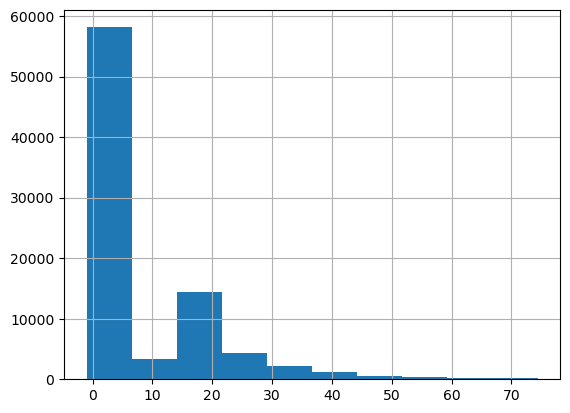

In [61]:
# 数据可视化
import matplotlib.pyplot as plt
hist = df["VOLATILITY_30D"].hist() # 直方图

<Axes: >

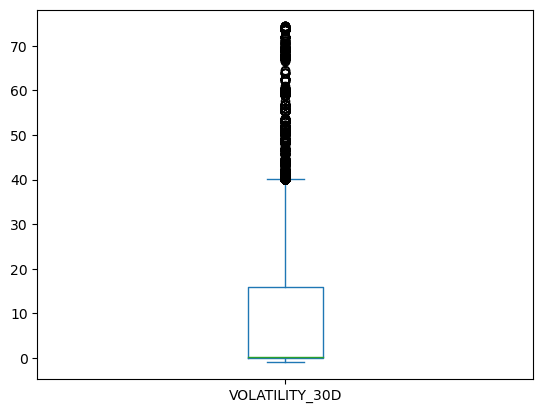

In [62]:
df["VOLATILITY_30D"].plot.box() # 盒图及离群点

<Axes: >

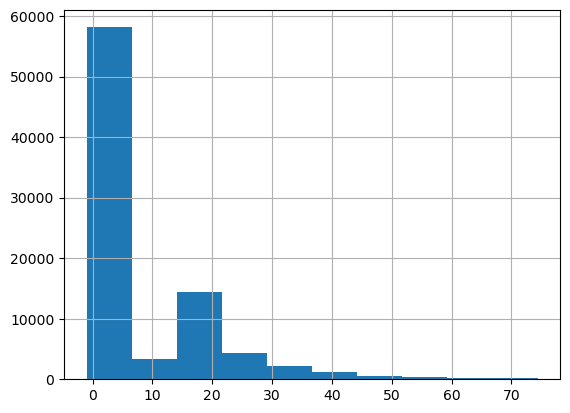

In [63]:
# 缺失值处理
# 剔除缺失值
data_dropna = df["VOLATILITY_30D"].dropna(axis = 0)
data_dropna.hist() # 直方图

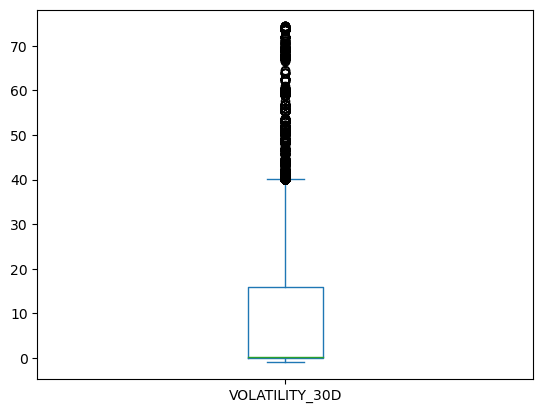

In [64]:
data_dropna.plot.box()
plt.show() # 盒图

<Axes: >

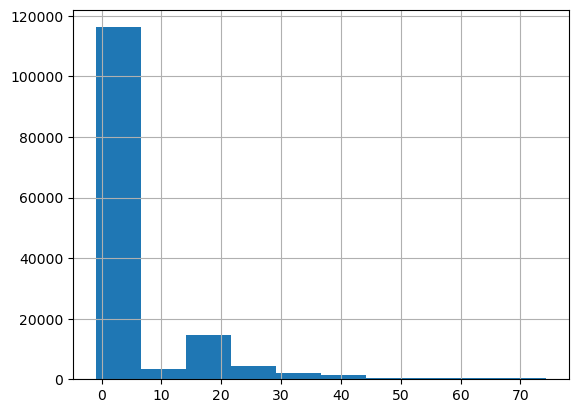

In [68]:
# 用最高频率值来填补缺失值
data_fillna=df["VOLATILITY_30D"].fillna(df["VOLATILITY_30D"].mode()[0])
data_fillna.hist() # 直方图

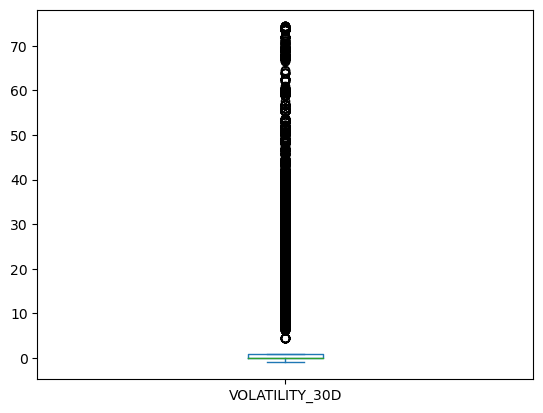

In [69]:
data_fillna.plot.box()
plt.show() # 盒图

In [70]:
df["VOLATILITY_30D"].compare(data_fillna) #与原数据进行差异对比

,self,other
0,NaN,0.0
5,NaN,0.0
7,NaN,0.0
9,NaN,0.0
12,NaN,0.0
...,...,...
143270,NaN,0.0
143272,NaN,0.0
143274,NaN,0.0
143277,NaN,0.0


<Axes: >

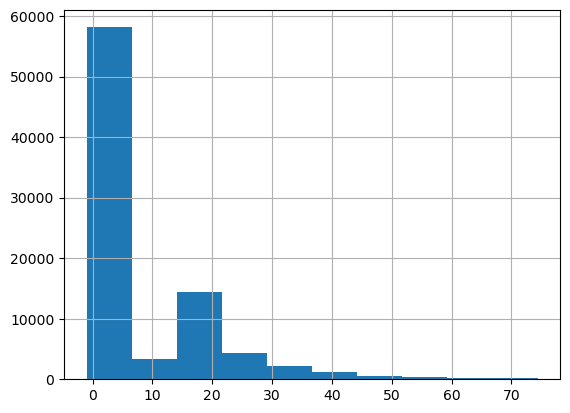

In [71]:
# 通过属性的相关关系来填补缺失值
data_fillna=df["VOLATILITY_30D"].fillna(df["VOLATILITY_10D"].corr(df["VOLATILITY_30D"]) * df["VOLATILITY_10D"]) 
data_fillna.hist() # 直方图

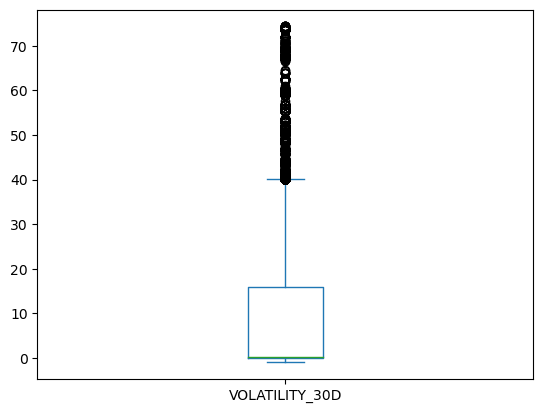

In [72]:
data_fillna.plot.box()
plt.show() # 盒图

In [73]:
df["VOLATILITY_30D"].compare(data_fillna) #与原数据进行差异对比

,self,other
674,NaN,62.629640
3320,NaN,62.629640
4147,NaN,62.629640
5493,NaN,67.870481
5738,NaN,67.870481
5888,NaN,67.870481
5933,NaN,67.870481
6011,NaN,67.870481
6561,NaN,67.870481
61165,NaN,-0.735763


<Axes: >

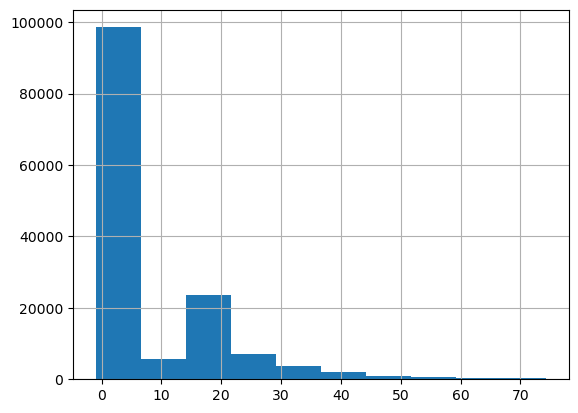

In [74]:
# 通过数据对象之间的相似性来填补缺失值
data_fillna=df["VOLATILITY_30D"].interpolate(method='nearest') #采用最邻近线性插值
data_fillna.hist() # 直方图

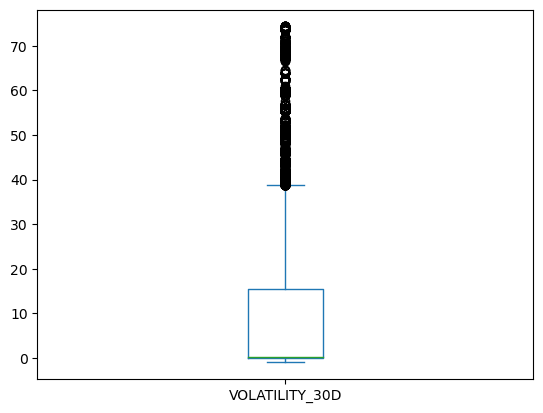

In [75]:
data_fillna.plot.box()
plt.show() # 盒图

In [76]:
df["VOLATILITY_30D"].compare(data_fillna) #与原数据进行差异对比

,self,other
5,NaN,16.099
7,NaN,-1.000
9,NaN,1.000
12,NaN,17.298
14,NaN,1.000
...,...,...
143270,NaN,-1.000
143272,NaN,1.000
143274,NaN,-1.000
143277,NaN,22.946
